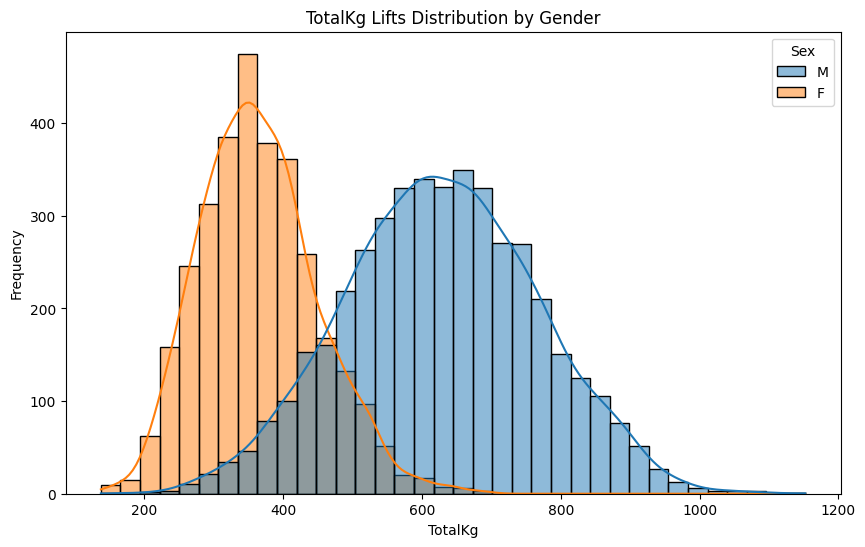

Independent Samples T-Test Results:
T-statistic: 94.79492392841424
P-value: 0.0
Result: There is a significant difference in lifting results. Reject the null hypothesis.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Data filtering 
filtered_df = df[(df['Event'] == 'SBD') & (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')]

# Remove NaN values from the 'TotalKg' column
filtered_df = filtered_df.dropna(subset=['TotalKg'])

# Perform statistical analysis based on gender
men = filtered_df[filtered_df['Sex'] == 'M']['TotalKg']
women = filtered_df[filtered_df['Sex'] == 'F']['TotalKg']

# Visualize sample data distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='TotalKg', hue='Sex', kde=True)
plt.title('TotalKg Lifts Distribution by Gender')
plt.xlabel('TotalKg')
plt.ylabel('Frequency')
plt.show()

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(men, women)

# Display t-test results
print("Independent Samples T-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Result: There is a significant difference in lifting results between men and women")
else:
    print("Result: There is no significant difference between men and women lifting results. Fail to reject the null hypothesis.")

    # Explanation on the data below: 
    # t_stat is measuring the difference between the means of the two groups relative to
    # the variability within the groups. TLDR: A larger t-statistic means a greater difference between groups.
    # p_value is calculating that the null hypothesis is true based on data. 
    # A smaller p-value equals stronger evidence against the null hypothesis. 
    # Based on the obtained results you can compare it to a pre-defined significance level (0.05 is used most often)
    # If the p-value is less than 0.05, you fail to reject the null hypothesis. In that case there is no significant difference between the means of the two groups.
    # The data shows clearly that men do indeed lift more than women in total kgs.
